# Test BERT as a Service Package

- [BERT as a Service GitHub](https://github.com/hanxiao/bert-as-service) - get embeddings for passed in sentences
  

<BR>


**To Get embeddings on demand need run the Server with following commands in Terminal (launch server)**
1. conda activate tf-env 
2. bert-serving-start -model_dir "/Volumes/GoogleDrive/My\ Drive/Colab/IDS\ 566\ -\ Advanced\ Text\ Analytics/Project/Code/models/uncased_L-12_H-768_A-12" -num_worker=1

(Using uncased BERT, lowercased, small version)

In [ ]:
# Get Quotes Data
import pandas as pd 

df = pd.read_csv("../Data/COMBINED-QUOTES.csv", engine="python") #C is default engine, change to py if unicode issue
df["author"] = df["author"].str.lower() #Team Added Author Strings not LowerCase

FileNotFoundError: ignored

In [ ]:
# Min Example from BERT Repo 
from bert_serving.client import BertClient
bc = BertClient()
bc.encode(['First do it', 'then do it right', 'then do it better'])



array([[ 0.13186456,  0.32404113, -0.82704365, ..., -0.37119594,
        -0.39250165, -0.31721866],
       [ 0.24873531, -0.12334377, -0.38933858, ..., -0.44756234,
        -0.5591355 , -0.11345178],
       [ 0.28627336, -0.18580152, -0.30906835, ..., -0.29593655,
        -0.39310524,  0.07640245]], dtype=float32)

In [ ]:
# Quotes from Position
#quote = [df.iloc[0, 0]] #1 Quote Embedding
#quote = [df.iloc[i, 0] for i in range(0, 100)] #for num=range(0, x) embeddings

# Quotes by Author
ae = df[df["author"] == "albert einstein"]
quote = [ae.iloc[i, 0] for i in range(0, len(ae)-112)] #get quote for all quotes in the len of albert einstein's subsetted df


# Get Embeddings from Text
quote_vec = bc.encode(quote)
quote_vec

array([[-0.08751059,  0.27226433,  0.05366058, ..., -0.19513443,
        -0.30188996,  0.48273125],
       [-0.41968068,  0.6878022 ,  0.10613526, ..., -0.39117095,
        -0.05850487,  0.35174346],
       [-0.07218608,  0.5280538 ,  0.07611798, ..., -0.46019512,
        -0.03740262,  0.31206957],
       ...,
       [ 0.17644058,  0.5238356 ,  0.02224007, ..., -0.1234904 ,
        -0.11600439,  0.68533134],
       [-0.12310077,  0.37626916,  0.24818532, ..., -0.42499998,
        -0.28956145,  0.11263736],
       [-0.04915962,  0.16997096,  0.00340318, ..., -0.38334146,
        -0.12737118,  0.46399912]], dtype=float32)

In [ ]:
quote_vec.shape
quote

['Common sense is the collection of prejudices acquired by age eighteen.',
 'Reading, after a certain age, diverts the mind too much from its creative pursuits. Any man who reads too much and uses his own brain too little falls into lazy habits of thinking.',
 'Confusion of goals and perfection of means seems, in my opinion, to characterize our age.',
 'Perfection of means and confusion of ends seem to characterize our age.',
 'It is strange to be known so universally and yet to be so lonely.',
 'Anger dwells only in the bosom of fools.',
 'True art is characterized by an irresistible urge in the creative artist.']

In [ ]:
df["author"].nunique()

11110

In [ ]:
# Add Embeddings Column per Author -- TESTING
author_embeddings = {
    "author" : [],
    "embeddings" : [], 
    "num_quotes" : []
}

# Get Embeddings & Add to Dict
n_remaining = df["author"].nunique()

for author_name in df["author"].unique():

    # Print Info per 100 embeddings
    n_remaining -= 1
    if n_remaining % 100 == 0:
        print(n_remaining, "Authors Left") #need python 3.6 or newer for f-strings

    # Loc DF to current unique author
    dfi = df[df["author"]==author_name]
    # Get Embeddings for all embeddings in df 
    embedded_quotes = bc.encode([dfi.iloc[i, 0] for i in range(0, len(dfi))])

    # Append Vals to Dict 
    author_embeddings["author"].append(author_name)
    author_embeddings["embeddings"].append(embedded_quotes)
    author_embeddings["num_quotes"].append(len(dfi))

    if n_remaining == 11109:
        print("TEST ENDED")
        break




# Make df out of dict & Write Out
edf = pd.DataFrame.from_dict(author_embeddings)
edf.to_csv("../Data/AuthorQuoteEmbeddings.csv")


TEST ENDED


In [ ]:
edf.loc[0, "embeddings"].shape

(100, 768)

In [ ]:
edf.loc[0, "embeddings"].shape
edf
df

,quote,author
0,Age is an issue of mind over matter. If you do...,mark twain
1,"Anyone who stops learning is old, whether at t...",henry ford
2,Wrinkles should merely indicate where smiles h...,mark twain
3,True terror is to wake up one morning and disc...,kurt vonnegut
4,A diplomat is a man who always remembers a wom...,robert frost
5,"As I grow older, I pay less attention to what ...",andrew carnegie
6,How incessant and great are the ills with whic...,c. s. lewis
7,"Old age, believe me, is a good and pleasant th...",confucius
8,Old age has deformities enough of its own. It ...,eleanor roosevelt
9,Nobody grows old merely by living a number of ...,samuel ullman


- Getting `quote_vecs` for Einstein on CPU took 2.1m-- on GPU it only took 1.6s

- Used `max_seq_len`=250 when running BERT server as max len of quote (tokens) was 505, but the distribution of tokens dropped off around 250 (about 2nd Std Dev.)

In [ ]:
# Client Status
bc.status

In [ ]:
# Server Status
bc.server_status

## Visualize Doc Vecs with T-SNE

- Making use of [yellowbrick](https://github.com/DistrictDataLabs/yellowbrick/tree/main) Wrapper
- [SciKit Learn Yellowbrick Viz Page](https://www.scikit-yb.org/en/latest/api/text/tsne.html)

In [ ]:
quote_vec[0]
quote_vec.shape
type(quote_vec)



numpy.ndarray

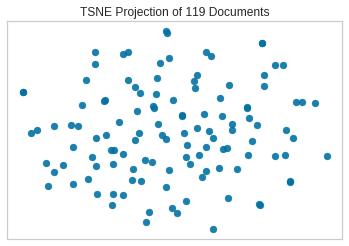

In [ ]:
# Dimensionality Reduction for Visualization
from yellowbrick.text import TSNEVisualizer 


# Create the visualizer and draw the vectors
tsne = TSNEVisualizer(colors="#B1C5FF", random_state=42, alpha=0.9)
tsne.fit(quote_vec)

tsne.finalize() #get rid of misc stuff on arch
#tsne.show() #not working on Arch Box -- get cute viz on MacOS

In [ ]:
type(TSNEVisualizer())


yellowbrick.text.tsne.TSNEVisualizer